### Task 2 - Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Загрузим игрушечный датасет из sklearn

iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [3]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=42)

In [6]:
# Применим алгоритм к-ближайших соседей

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Доля правильных ответов без PCA на тестовой выборке: {accuracy_score(y_test, y_pred)}')

Доля правильных ответов без PCA на тестовой выборке: 1.0


In [21]:
# Найдем собственные векторы и собственные значения (англ. Eigenvalues)
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i, end='\n\n')

Собственные значения в порядке убывания:
(437.7746724797988, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))

(137.10457072021055, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))

(22.013531335697195, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))

(3.107225464292886, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))



In [25]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент:\n \n{var_exp}\n')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам: \n \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент:
 
[72.96244541329987, 22.850761786701778, 3.6689218892828697, 0.5178709107154814]

Кумулятивная доля дисперсии по компонентам: 
 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [26]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [27]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)

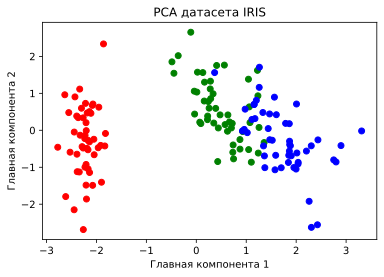

In [28]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [29]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.25, random_state=42)

In [31]:
#используем алгоритм к-ближайших соседей
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
print(f'Доля правильных ответов после применения PCA на тестовой выборке: {accuracy_score(y_test, y_pred)}')

Доля правильных ответов после применения PCA на тестовой выборке: 0.9473684210526315


In [ ]:
Вывод: после применения РСА при алгоритме качество снизилось. 

### Task 1 - (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [32]:
covariance_matrix

array([[150.        , -17.63546762, 130.76306638, 122.69116894],
       [-17.63546762, 150.        , -64.26601565, -54.91888988],
       [130.76306638, -64.26601565, 150.        , 144.42981471],
       [122.69116894, -54.91888988, 144.42981471, 150.        ]])

In [38]:
# Применим сингулярное разложение к ковариационной матрице
U_b, s_b, VT_b = np.linalg.svd(covariance_matrix)

print(f'Собственные значения:\n{s_b}\n')
print(f'Собственные векторы:\n{U_b}')

Собственные значения:
[437.77467248 137.10457072  22.01353134   3.10722546]

Собственные векторы:
[[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]


In [39]:
W = np.hstack((U_b.T[0].reshape(4,1), U_b.T[1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.52106591 -0.37741762]
 [ 0.26934744 -0.92329566]
 [-0.5804131  -0.02449161]
 [-0.56485654 -0.06694199]]
